### <font color="Indigo"><h1 align="center">Electronic Store Sales Analysis</h1></font>

## <font color='indigo'><h4>Importing Necessary Libraries</h4></font>
#### If these libraries are not installed in your system, You can install them by `pip install <library name>` e.g: `pip install numpy` on cmd or just install `Anaconda`, Everything will be installed along with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For "A value is trying to be set on a copy of a slice from a DataFrame." Warning.
pd.options.mode.chained_assignment = None

## <font color='#B32133'><h2>Part 1</h2></font>
### <font color="indigo"><h3>Loading Dataset</h3></font>

In [2]:
df = pd.read_csv('./Sales_Data/Sales.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## <font color='#B32133'><h2>Part 2</h2></font>

### <font color='indigo'><h3>Data Cleaning</h3></font>
#### As we all know that data is never perfect, as a Data analyst it's our job to make the data useful as per job. This data is messy and contains `NAN`, `Duplicates` and some other outlyers which needs to be cleaned.

### <font color='indigo'><h4>Finding NaN Values</h4></font>

In [3]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### <font color='indigo'><h4>Cleaning/Droping NaN Values</h4></font>

In [4]:
df.dropna(how='all',inplace=True)
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### As I explored this dataset more I found there were some text in Order date instead of actual order date and those values need to be removed for proper analysis.
#### `Tip:` Take sometime to explore your data and see what needs to be removed/changed for the `Analysis`.

In [5]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
df[df['Order Date'] == 'Order Date'].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64

### <font color="Indigo"><h4>Getting rid of text values</h4></font>

In [7]:
df = df[df['Order Date'] != 'Order Date']
df[df['Order Date'] == 'Order Date'].count()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### <font color="Indigo"><h4>Re-setting Index and Droping previous</h4></font>

In [8]:
df.reset_index(inplace=True,drop=True)

### <font color="Indigo"><h4>Converting columns into right DataType</h4></font>

In [9]:
# Checking DataTypes of Columns
cols = df.columns

for i in range(len(cols)):
    print(cols[i], '=' ,type(df[cols[i]][0]))

Order ID = <class 'str'>
Product = <class 'str'>
Quantity Ordered = <class 'str'>
Price Each = <class 'str'>
Order Date = <class 'str'>
Purchase Address = <class 'str'>


In [10]:
# "Quantity Ordered" and "Price Each" into Numeric Type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [11]:
# Order Date to DateTIme
df['Order Date'] = pd.to_datetime(df['Order Date'])

## <font color='#B32133'><h2>Part 3</h2></font>

### <font color='indigo'><h3>Adding Some Necessary Columns</h3></font>

- <font><h5>City</h5><font>
- <font><h5>Month</h5><font>
- <font><h5>Hour</h5><font>
- <font><h5>Sales</h5><font>

- <font color="indigo"><h3>City</h3><font>

In [12]:
# Methods for getting city and state from "Purchase Address" Column.

def getting_city(cell):
    return cell.split(sep=',')[1].strip()

def getting_state(cell):
    return cell.split(sep=',')[2].strip()[0:2]

In [13]:
# Creating Column of City with State
df['City'] = df['Purchase Address'].apply(lambda x:getting_city(x) + ', ' + getting_state(x))

- <font color="indigo"><h3>Month</h3><font>

In [14]:
df['Month'] = df['Order Date'].dt.month

- <font color="indigo"><h3>Hour</h3><font>

In [15]:
df['Hour'] = df['Order Date'].dt.hour

- <font color="indigo"><h3>Sales</h3><font>

In [16]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

## <font color='#B32133'><h2>Part 4</h2></font>

### <font color="Indigo"><h3>Data Exploration (Most Important)</h3></font>

### <font color='#B32133'><h4>This section/part is most Important part of any `Analysis`, in this section we'll answer below business questions.</h4></font>
### 1. What was the best month for sales and how much was earned that month? 
### 2. Which city made the most sale and how much?
### 3. What time should we display advertisement to maximize likelihood of customer's buying products?
### 4. Which Product made the most sales and why?
### 5. Which Product was sold most and why?

<font color="indigo"><h3>Some Necessary things before diving in</h3><font>

In [17]:
# Colors Dictionary
colors = {'Inkwell':'#363945',
          'Classic Blue':'#34568B',
          'Navy Blazer':'#282D3C',
          'Megenta red':'#A02133',
          'Evening Blue':'#2A293E',
          'Samba':'#A2242F'}


# Defining a Bar Graph function for Visualization

def bar_chart(x,y,title,xlabel,ylabel,gcolor='black',x_rotation='horizontal'):
    
    # Figure Size
    plt.figure(figsize=(8,4))
    
    # Drawing Bar Chart
    plt.bar(x,y,color=gcolor)
    
    # Titles and Label
    plt.title(title,size=18)
    plt.xlabel(xlabel,size=15)
    plt.ylabel(ylabel,size=15)
    
    # Ticks
    plt.xticks(x,rotation=x_rotation)

## <font color='#B32133'><h4>Q1. What was the best month for sales and how much was earned that month? </h4></font>

In [18]:
result = df.groupby('Month').sum()[['Sales']]
result

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


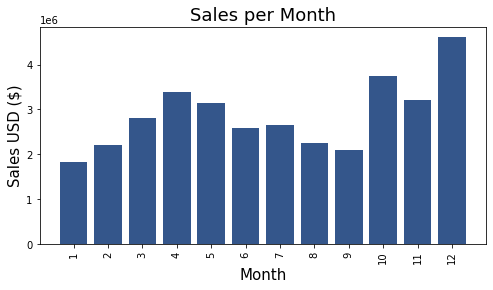

In [19]:
x = result.index
y = result['Sales']

bar_chart(x,y,'Sales per Month','Month','Sales USD ($)',colors['Classic Blue'],'vertical')

### <font color="#34568B"><h4>Answer: December was the best Month for Sales and "4.613443e+06" = "4613443" (USD) $ were earned.</h4></font>

## <font color='#B32133'><h4>Q2. Which city made the most sale and how much?</h4></font>

In [20]:
result = df.groupby('City').sum()[['Sales']]
result

,Sales
City,
"Atlanta, GA",2.795499e+06
"Austin, TX",1.819582e+06
"Boston, MA",3.661642e+06
"Dallas, TX",2.767975e+06
"Los Angeles, CA",5.452571e+06
"New York City, NY",4.664317e+06
"Portland, ME",4.497583e+05
"Portland, OR",1.870732e+06
"San Francisco, CA",8.262204e+06


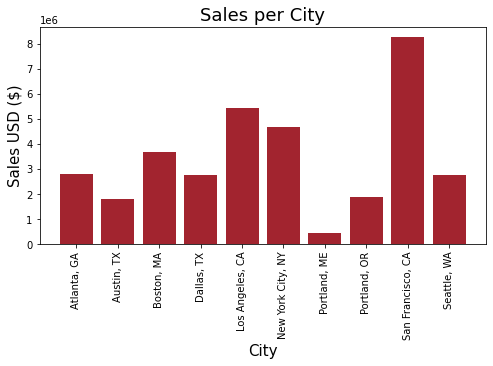

In [21]:
x = result.index
y = result['Sales']

bar_chart(x,y,'Sales per City','City','Sales USD ($)',colors['Samba'],'vertical')

### <font color="#34568B"><h4>Answer: "San Francisco, CA" made the most sales and "8.262204e+06" = "8262204" (USD) $ were earned.</h4></font>

### <font color='#B32133'><h4>Q3. What time should we display advertisement to maximize likelihood of customer's buying products?</h4></font>

In [22]:
result = df.groupby('Hour').sum()[['Sales']].sort_values('Sales',ascending=False)
result

,Sales
Hour,
19,2412938.54
12,2316821.34
11,2300610.24
20,2281716.24
18,2219348.30
13,2155389.80
17,2129361.61
14,2083672.73
21,2042000.86


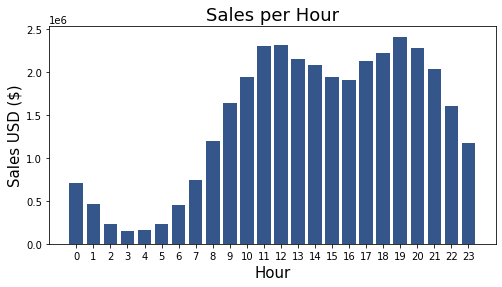

In [23]:
x = result.index
y = result['Sales']

bar_chart(x,y,'Sales per Hour','Hour','Sales USD ($)',colors['Classic Blue'])

### <font color="#34568B"><h4>Conclusion: Sales are at peak at "11", "12" of morning and "7" of Evening, Showing advertisement at these hours can increase chances of business drastically.</h4></font>

## <font color='#B32133'><h4>Q4. Which Product made the most sales and why?</h4></font>

In [24]:
result = df.groupby('Product').sum()[['Quantity Ordered','Sales']].sort_values('Sales',ascending=False)
result

,Quantity Ordered,Sales
Product,,
Macbook Pro Laptop,4728,8037600.00
iPhone,6849,4794300.00
ThinkPad Laptop,4130,4129958.70
Google Phone,5532,3319200.00
27in 4K Gaming Monitor,6244,2435097.56
34in Ultrawide Monitor,6199,2355558.01
Apple Airpods Headphones,15661,2349150.00
Flatscreen TV,4819,1445700.00
Bose SoundSport Headphones,13457,1345565.43


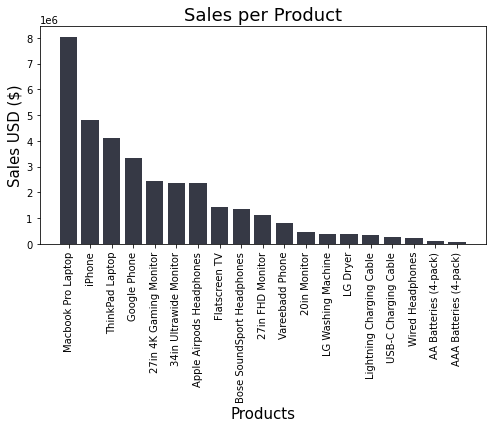

In [25]:
x = result.index
y = result['Sales']

bar_chart(x,y,'Sales per Product','Products','Sales USD ($)',colors['Inkwell'],'vertical')

### <font color="#34568B"><h4>Answer: "Macbook Pro Laptop" made the most sale, making about "8037600" (USD). The reason it made the most sales is because it's Expensive and 4728 were sold each costing about 1700 $,.</h4></font>

## <font color='#B32133'><h4>Q5. Which Product was sold most and why?</h4></font>

In [26]:
# Sold Products and Prices Dataframes
most_sold_products = df.groupby('Product').sum()[['Quantity Ordered']].sort_values('Quantity Ordered',ascending=False)
prices = df.groupby('Product').mean()[['Price Each']]

# Reseting Their Index
most_sold_products.reset_index(inplace=True)
prices.reset_index(inplace=True)

# Merging both DataFrames "most_sold_products" and "Prices"
most_sold_products_prices = pd.merge(most_sold_products,prices,on='Product')
most_sold_products_prices

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


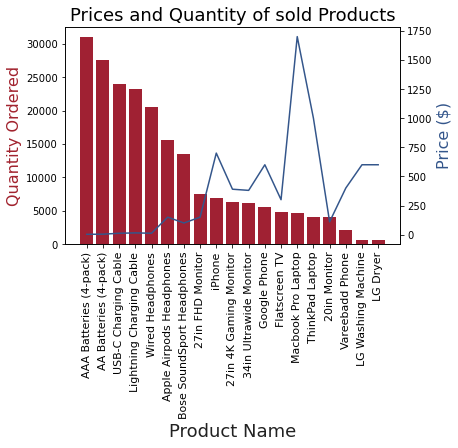

In [27]:
# Dimesions
products = most_sold_products_prices['Product']
quantity_ordered = most_sold_products_prices['Quantity Ordered']
prices = most_sold_products_prices['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Drawing Graphs
ax1.bar(products, quantity_ordered, color=colors['Megenta red'])
ax2.plot(products, prices, color=colors['Classic Blue'])

# Titles and Labels
plt.title('Prices and Quantity of sold Products',size=18)
ax1.set_xlabel('Product Name',color='#222',size=18)
ax1.set_ylabel('Quantity Ordered', color=colors['Samba'],size=16)
ax2.set_ylabel('Price ($)', color=colors['Classic Blue'],size=16)

# Xticks
ax1.set_xticklabels(products, rotation='vertical', size=11);

### <font color="#34568B"><h4>Answer: "AAA Batteries (4-pack)" is the most sold product (Quantity wise), the reason it is sold most is because this product holds very low price and is used in most of daily work.</h4></font>

### <font color="#282D3C"><h4 align="Center">That's it Guys for this Analysis, I hope you guys enjoyed and learnt something from it like I did.</h4></font>
### <font color="#A02133"><h4 align="Center">Peace Out!</h4></font>